In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [50]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

#get the columns for measurement
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
    
print(" ")

columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
 
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

Query Date one year ago:  2016-08-23


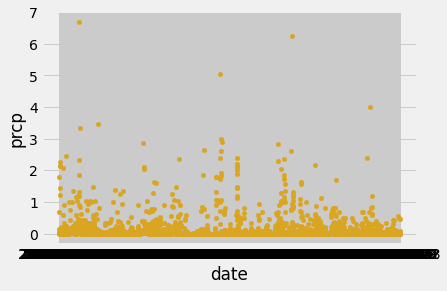

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
rec_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23)-dt.timedelta(days=365)
print("Query Date one year ago: ", year_ago)

# Perform a query to retrieve the data and precipitation scores
data =session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= year_ago).\
        filter(Measurement.date <= '2017-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation = pd.DataFrame(data=data)

# Sort the dataframe by date
prcp_df = precipitation.sort_values(by=['date'])
prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
ax1 = prcp_df.plot.scatter(x='date', y='prcp',c='goldenrod')



In [48]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [74]:
# Design a query to calculate the total number stations in the dataset
data =session.query(func.count(Station.station)).scalar()
print("Number of stations: ", data)

Number of stations:  9


In [76]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [90]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mini = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').scalar()
avgv = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').scalar()
maxa = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').scalar()
print('Lowest Temperature: '+str(mini))
print('Highest Temperature: '+str(maxa))
print('Average Temperature: '+str(round(avgv,1)))

Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.7


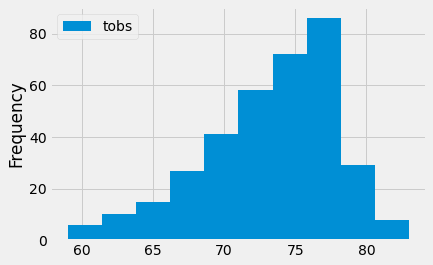

In [94]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data =session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.station == 'USC00519281').\
        filter(Measurement.date >= year_ago).\
        filter(Measurement.date <= '2017-08-23').all()

temp_df = pd.DataFrame(data=data)

ax1 = temp_df.plot.hist()

# Close session

In [95]:
# Close Session
session.close()